In [1]:
import qiskit
import qiskit_ibm_runtime
import pylatexenc
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator

In [6]:
def get_service():
    try:
        # Try to instantiate service (will fail if no token saved or token is invalid)
        return QiskitRuntimeService(channel="ibm_cloud")
    except Exception as e:
        print(f"Error: {e}")
        # Ask user if they want to renew their local credentials
        renew = input("Your IBM Quantum credentials are invalid or missing. Do you want to renew them? (y/n): ").strip().lower()
        if renew == "y":
            try:
                QiskitRuntimeService.delete_account()
                print("Old local credentials deleted.")
            except Exception as del_e:
                print(f"Could not delete old credentials (maybe none existed): {del_e}")
            token = input("Enter your new IBM Quantum API token: ").strip()
            QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, instance="ibm-q/open/main", overwrite=True)
            return QiskitRuntimeService(channel="ibm_cloud")
        else:
            raise RuntimeError("IBM Quantum credentials are required to proceed.")

In [7]:
# Use the function to get the service
service = get_service()

C:\Users\serko\AppData\Local\Temp\ipykernel_12848\115272355.py:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  return QiskitRuntimeService(channel="ibm_cloud")


Error: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'
Old local credentials deleted.


C:\Users\serko\AppData\Local\Temp\ipykernel_12848\115272355.py:17: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  return QiskitRuntimeService(channel="ibm_cloud")


IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [4]:
# Now you can use the service as usual
backend = service.backend(name='ibm_brisbane')
print("Number of qubits:", backend.num_qubits)
print("Backend properties:", backend.properties())
print("Backend status:", backend.status())
# Print faulty qubits (if any)
faulty_qubits = []
properties = backend.properties()
for qubit_index, qubit in enumerate(properties.qubits):
    for item in qubit:
        if item.name == 'T1' and item.value is None:
            faulty_qubits.append(qubit_index)
print("Faulty qubits:", faulty_qubits)

Number of qubits: 127
Backend properties: <qiskit_ibm_runtime.models.backend_properties.BackendProperties object at 0x000002C1FB97D250>
Backend status: <qiskit_ibm_runtime.models.backend_status.BackendStatus object at 0x000002C1FBA50E10>
Faulty qubits: []


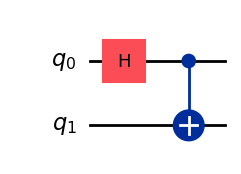

In [5]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
# Add a Hadamard gate to qubit 0
qc.h(0)
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
# this system is made from 2 qubits, so the circuit is 4x4, a kronocker product of 2x2 matrices
# and the circuit is a 4x4 matrix
qc.draw("mpl")

In [ ]:
# Tensor products (from IBM Quantum documentation)

zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)

plus = Statevector.from_label("+")
minus_i = Statevector.from_label("l")
phi = plus.tensor(minus_i)
display(phi.draw("latex")) # or display((plus ^ minus_i).draw("latex"))

<IPython.core.display.Latex object>

In [9]:
H = Operator.from_label("H")
I = Operator.from_label("I")
X = Operator.from_label("X")
display(H.tensor(I).draw("latex"))
display(H.tensor(I).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>